# Import Important Library

In [ ]:
!pip install datasets

In [2]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import Dataset

#1. Review Classification



#Load and preprocess dataset

In [3]:
df = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

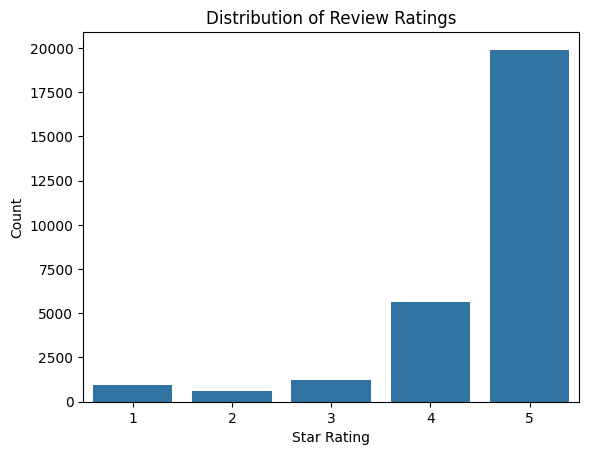

In [ ]:
sns.countplot(x='reviews.rating', data=df)
plt.title("Distribution of Review Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()


In [7]:
df = df[['reviews.text', 'reviews.rating']]
df = df.dropna()

In [8]:
df.head()

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5


# Mapping Star Ratings to Sentiment Classes

In [9]:
def map_sentiment(rate):
    if rate in [1, 2]:
        return 0  # Negative
    elif rate == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

In [10]:
df['label'] = df['reviews.rating'].apply(map_sentiment)

In [11]:
df.head()

,reviews.text,reviews.rating,label
0,I order 3 of them and one of the item is bad q...,3,1
1,Bulk is always the less expensive way to go fo...,4,2
2,Well they are not Duracell but for the price i...,5,2
3,Seem to work as well as name brand batteries a...,5,2
4,These batteries are very long lasting the pric...,5,2


In [12]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [13]:
dataset = Dataset.from_pandas(df[['reviews.text', 'label']].rename(columns={'reviews.text': 'text'}))

In [14]:
def tokenize(example):
    return tokenizer(example['text'], truncation=True, padding=True)

dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/28332 [00:00<?, ? examples/s]

# Train/test split


In [15]:
dataset = dataset.train_test_split(test_size=0.2)
train_dataset = dataset['train']
test_dataset = dataset['test']

# Load and Train Model

In [16]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    logging_steps=10,
)

In [18]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [22]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

<ipython-input-22-c87722262378>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.117800,0.180814,0.938945,0.935636,0.938945,0.934322
2,0.085300,0.147413,0.958708,0.958226,0.958708,0.958450
3,0.014000,0.158976,0.961532,0.959828,0.961532,0.960574


TrainOutput(global_step=4251, training_loss=0.1394560317682171, metrics={'train_runtime': 762.5233, 'train_samples_per_second': 89.171, 'train_steps_per_second': 5.575, 'total_flos': 9007281400826880.0, 'train_loss': 0.1394560317682171, 'epoch': 3.0})

# Model Evaluating

In [ ]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.14741308987140656, 'eval_accuracy': 0.9587083112758074, 'eval_precision': 0.9582256595217303, 'eval_recall': 0.9587083112758074, 'eval_f1': 0.9584498834361267, 'eval_runtime': 20.3646, 'eval_samples_per_second': 278.278, 'eval_steps_per_second': 17.432, 'epoch': 3.0}


              precision    recall  f1-score   support

    Negative       0.85      0.82      0.83       318
     Neutral       0.57      0.56      0.57       233
    Positive       0.98      0.99      0.98      5116

    accuracy                           0.96      5667
   macro avg       0.80      0.79      0.79      5667
weighted avg       0.96      0.96      0.96      5667



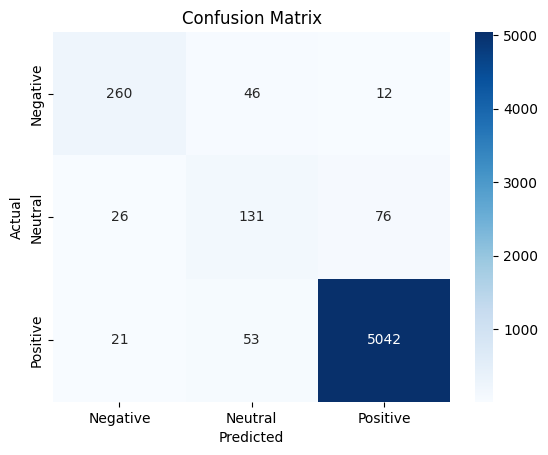

In [ ]:
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

#Confusion Matrix
cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save model and tokenizer
model.save_pretrained("./sentiment-model")
tokenizer.save_pretrained("./sentiment-model")


('./sentiment-model/tokenizer_config.json',
 './sentiment-model/special_tokens_map.json',
 './sentiment-model/vocab.txt',
 './sentiment-model/added_tokens.json',
 './sentiment-model/tokenizer.json')

# Try upsampling negative/neutral samples to make balance

In [19]:
# Split training dataset by class
neg = train_dataset.filter(lambda x: x['label'] == 0)
neu = train_dataset.filter(lambda x: x['label'] == 1)
pos = train_dataset.filter(lambda x: x['label'] == 2)

# Find the max
max_size = max(len(neg), len(neu), len(pos))

def upsample(dataset, target_size):
    dataset = dataset.shuffle(seed=42)
    indices = [i % len(dataset) for i in range(target_size)]
    return dataset.select(indices)

# Upsample the smaller classes
upsampled_neg = upsample(neg, max_size)
upsampled_neu = upsample(neu, max_size)
upsampled_pos = pos

from datasets import concatenate_datasets
train_dataset_balanced = concatenate_datasets([upsampled_neg, upsampled_neu, upsampled_pos]).shuffle(seed=42)


Filter:   0%|          | 0/22665 [00:00<?, ? examples/s]

Filter:   0%|          | 0/22665 [00:00<?, ? examples/s]

Filter:   0%|          | 0/22665 [00:00<?, ? examples/s]

In [20]:
balanced_df = train_dataset_balanced.to_pandas()
# Check how many examples per class
balanced_df['label'].value_counts()

,count
label,
1,20443
2,20443
0,20443


In [23]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_balanced,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


<ipython-input-23-55afe22e9d21>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [24]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: renwasadik (renwasadik-university-of-jeddah) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.028900,0.260253,0.959767,0.959555,0.959767,0.959660
2,0.042100,0.301272,0.956767,0.957914,0.956767,0.957296
3,0.056200,0.311055,0.962767,0.960845,0.962767,0.961636


TrainOutput(global_step=11502, training_loss=0.06928238422848972, metrics={'train_runtime': 1986.4056, 'train_samples_per_second': 92.623, 'train_steps_per_second': 5.79, 'total_flos': 2.4372550145431424e+16, 'train_loss': 0.06928238422848972, 'epoch': 3.0})

{'eval_loss': 0.2602531313896179, 'eval_accuracy': 0.9597670725251456, 'eval_precision': 0.9595554463479492, 'eval_recall': 0.9597670725251456, 'eval_f1': 0.959659986185172, 'eval_runtime': 20.5057, 'eval_samples_per_second': 276.363, 'eval_steps_per_second': 17.312, 'epoch': 3.0}
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84       318
     Neutral       0.63      0.62      0.63       247
    Positive       0.98      0.98      0.98      5102

    accuracy                           0.96      5667
   macro avg       0.82      0.81      0.82      5667
weighted avg       0.96      0.96      0.96      5667



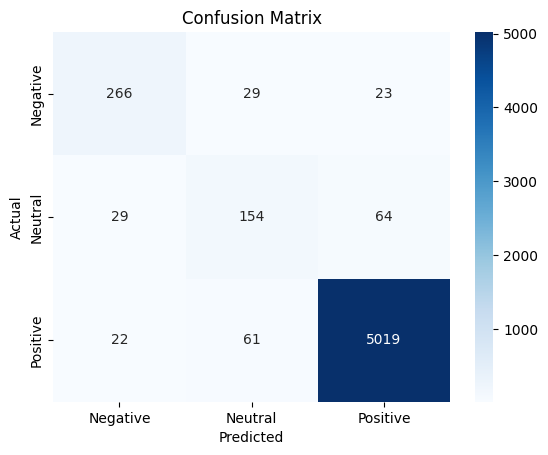

In [25]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

{'eval_loss': 0.2901444733142853, 'eval_accuracy': 0.9632962766896065, 'eval_precision': 0.9635182888561737, 'eval_recall': 0.9632962766896065, 'eval_f1': 0.9633894371815094, 'eval_runtime': 20.4646, 'eval_samples_per_second': 276.917, 'eval_steps_per_second': 17.347, 'epoch': 3.0}
              precision    recall  f1-score   support

    Negative       0.85      0.88      0.87       318
     Neutral       0.64      0.64      0.64       233
    Positive       0.99      0.98      0.98      5116

    accuracy                           0.96      5667
   macro avg       0.82      0.83      0.83      5667
weighted avg       0.96      0.96      0.96      5667



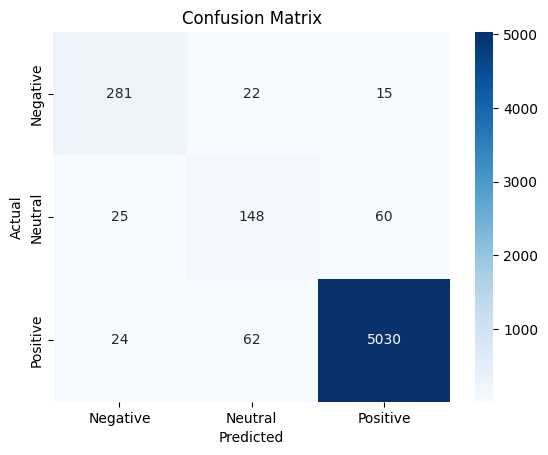

In [ ]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

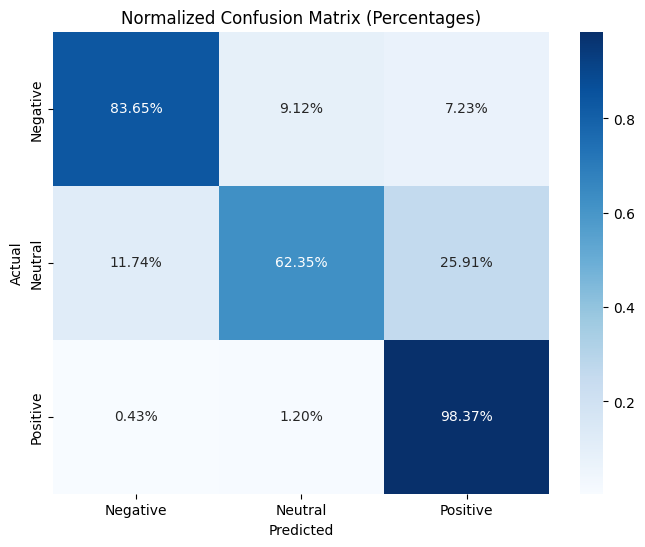

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, preds)

# Normalize the confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Percentages)')
plt.show()


In [ ]:
# Save the model and tokenizer
model.save_pretrained("./sentiment-model-balanced")
tokenizer.save_pretrained("./sentiment-model-balanced")

('./sentiment-model-balanced/tokenizer_config.json',
 './sentiment-model-balanced/special_tokens_map.json',
 './sentiment-model-balanced/vocab.txt',
 './sentiment-model-balanced/added_tokens.json',
 './sentiment-model-balanced/tokenizer.json')

# Try Roberte Model

In [ ]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification

tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')


In [ ]:
def tokenize(example):
    return tokenizer(example['text'], truncation=True, padding=True)

dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/22665 [00:00<?, ? examples/s]

Map:   0%|          | 0/5667 [00:00<?, ? examples/s]

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_balanced,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


<ipython-input-53-55afe22e9d21>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.449700,0.442109,0.865890,0.929596,0.865890,0.890777
2,0.239700,0.447272,0.890065,0.934982,0.890065,0.906545
3,0.126000,0.368518,0.919358,0.940394,0.919358,0.927677


TrainOutput(global_step=11493, training_loss=0.47988715966750006, metrics={'train_runtime': 3767.0605, 'train_samples_per_second': 48.808, 'train_steps_per_second': 3.051, 'total_flos': 4.837629609688781e+16, 'train_loss': 0.47988715966750006, 'epoch': 3.0})

{'eval_loss': 0.368518203496933, 'eval_accuracy': 0.9193576848420681, 'eval_precision': 0.9403937366419215, 'eval_recall': 0.9193576848420681, 'eval_f1': 0.9276766713688411, 'eval_runtime': 37.3731, 'eval_samples_per_second': 151.633, 'eval_steps_per_second': 9.499, 'epoch': 3.0}
              precision    recall  f1-score   support

    Negative       0.66      0.79      0.72       318
     Neutral       0.38      0.65      0.48       233
    Positive       0.98      0.94      0.96      5116

    accuracy                           0.92      5667
   macro avg       0.67      0.79      0.72      5667
weighted avg       0.94      0.92      0.93      5667



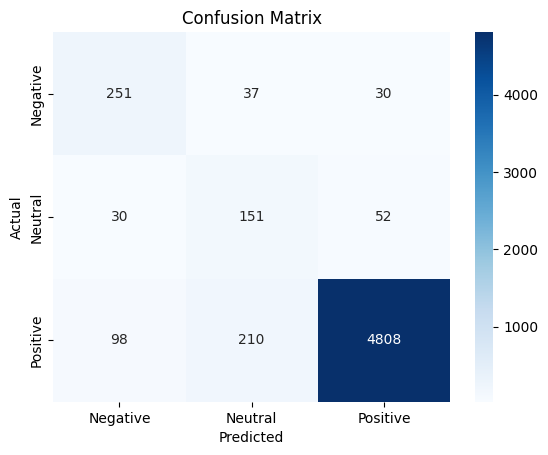

In [ ]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

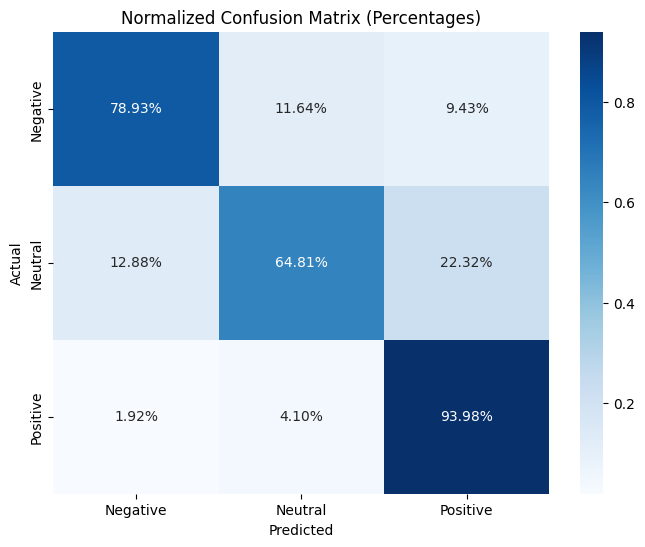

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, preds)

# Normalize the confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Percentages)')
plt.show()


In [ ]:
# Save the model and tokenizer
model.save_pretrained("./sentiment-model-roberta")
tokenizer.save_pretrained("./sentiment-model-roberta")

# 2. Product Category Clustering


# Import Important Library

In [18]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# Load data and Prepare Data


In [19]:
df = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")


# EDA

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [21]:
df['name'].value_counts()

,count
name,
AmazonBasics AAA Performance Alkaline Batteries (36 Count),8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,3728
"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",2443
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",2370
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",1676
...,...
AmazonBasics Silicone Hot Handle Cover/Holder - Red,1
AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity,1
"Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23""",1


In [52]:
df['primaryCategories'].value_counts()

,count
primaryCategories,
Electronics,13995
Health & Beauty,12071
"Toys & Games,Electronics",1676
"Office Supplies,Electronics",386
"Electronics,Media",185
Office Supplies,9
Animals & Pet Supplies,6
Home & Garden,2
"Electronics,Furniture",2


In [22]:
df['categories'].value_counts().head(10)

,count
categories,
"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",8343
"AA,AAA,Electronics Features,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",3728
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Genuine Tablet Accessories,Computers & Tablets,Electronics,Amazon",2443
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",2407
"Fire Tablets,Computers/Tablets & Networking,Electronics Features,Tablets,All Tablets,Amazon Tablets,Computers & Tablets,Electronics,iPad & Tablets,Tablets & eBook Readers",2370
"Fire Tablets,Learning Toys,Toys,Tablets,Amazon Tablets,Electronics, Tech Toys, Movies, Music,Computers & Tablets,Kids' Tablets,Electronics,iPad & Tablets,Tablets for Kids",1676
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",1425
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",1024
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Computers & Tablets,Tablets & eBook Readers",987


# Prepare Category text

In [71]:
df['all_categories'] = df['categories'].fillna('') + ' ' + df['primaryCategories'].fillna('')
df['all_categories'] = df['all_categories'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower()

# Load Sentence-BERT model

In [72]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [73]:
texts = df['all_categories'].tolist()
embeddings = model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/886 [00:00<?, ?it/s]

In [112]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

In [113]:
for i in range(df['cluster'].nunique()):
    print(f"\n Cluster {i}")
    sample = df[df['cluster'] == i]['name'].sample(20, random_state=42)
    for item in sample:
        print("-", item)


 Cluster 0
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
- AmazonBasics A

#  Map cluster to Meta Category

In [114]:
cluster_to_meta = {
    0: "Household & Camera Batteries",
    1: "Fire Tablets & Electronics",
    2: "Household & Camera Batteries",
    3: "E-Readers & Tablets",
    4: "Kids Tablets & Office Tech Essentials"
}

df['meta_category'] = df['cluster'].map(cluster_to_meta)


In [80]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,cluster,all_categories,meta_category,pca_x,pca_y
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",2,aaaaahealthelectronicshealth householdcamcord...,Household & Camera Batteries,-0.618979,0.016479
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",2,aaaaahealthelectronicshealth householdcamcord...,Household & Camera Batteries,-0.618979,0.016479
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",2,aaaaahealthelectronicshealth householdcamcord...,Household & Camera Batteries,-0.618979,0.016479
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",2,aaaaahealthelectronicshealth householdcamcord...,Household & Camera Batteries,-0.618979,0.016479
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",2,aaaaahealthelectronicshealth householdcamcord...,Household & Camera Batteries,-0.618979,0.016479


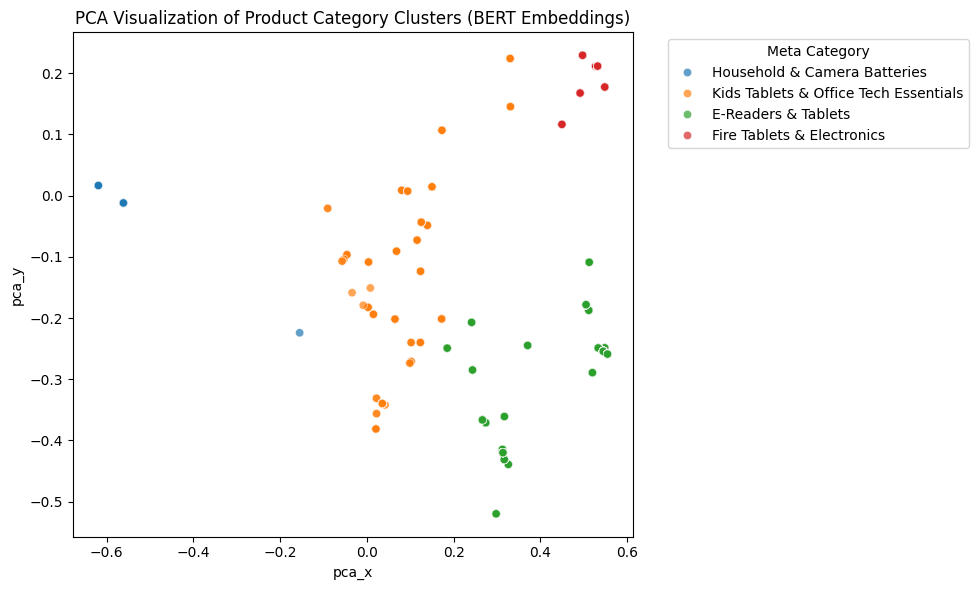

In [115]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)
df['pca_x'] = reduced[:, 0]
df['pca_y'] = reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='meta_category', palette='tab10', alpha=0.7)
plt.title('PCA Visualization of Product Category Clusters (BERT Embeddings)')
plt.legend(title='Meta Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [116]:
print("\nMeta-Category Distribution:")
print(df['meta_category'].value_counts())


Meta-Category Distribution:
meta_category
Household & Camera Batteries             12072
E-Readers & Tablets                       6283
Fire Tablets & Electronics                6070
Kids Tablets & Office Tech Essentials     3907
Name: count, dtype: int64


In [117]:
df.to_csv("final_amazon_reviews.csv", index=False)


In [83]:
# Save the SentenceTransformer model
model.save("sentence_transformer_model")

from joblib import dump
# Save the KMeans model
dump(kmeans, 'kmeans_model.joblib')


['kmeans_model.joblib']

In [84]:
import shutil

shutil.make_archive("sentence_transformer_model", 'zip', "sentence_transformer_model")


'/content/sentence_transformer_model.zip'

# Use Model for Prediction

In [107]:
import joblib
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('/content/sentence_transformer_model')

with open('/content/kmeans_model.joblib', 'rb') as f:
    kmeans_loaded = joblib.load(f)

new_data_point = model.encode(["Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi"])

predicted_cluster = kmeans_loaded.predict(new_data_point)

print(f"The new data point belongs to cluster: {predicted_cluster[0]}")


The new data point belongs to cluster: 3


# 3. Review Summarization Using Generative AI




In [4]:
import pandas as pd
from transformers import pipeline
from collections import Counter
import numpy as np
from nltk.corpus import stopwords

In [118]:
df = pd.read_csv('/content/final_amazon_reviews.csv')

In [119]:
df = df[['name', 'meta_category', 'reviews.text', 'reviews.rating']]
df = df.dropna(subset=['name', 'meta_category', 'reviews.text', 'reviews.rating'])

df['reviews.text'] = df['reviews.text'].astype(str).str.strip()
df['meta_category'] = df['meta_category'].astype(str)

In [120]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

Device set to use cpu


In [121]:
def get_top_and_worst_products(category_df, top_n=3):
    grouped = category_df.groupby('name').agg(
        avg_rating=('reviews.rating', 'mean'),
        review_count=('reviews.text', 'count')
    ).reset_index()

    top = grouped.sort_values(by=['avg_rating', 'review_count'], ascending=False).head(top_n)
    worst_candidates = grouped[grouped['avg_rating'] < 4]
    worst = (
        worst_candidates.sort_values(by='avg_rating', ascending=True).head(1)
        if not worst_candidates.empty
        else pd.DataFrame()  # return empty if none qualify
    )


    return top, worst

def extract_complaints(df, product_name, threshold=3):
    complaints = df[(df['name'] == product_name) & (df['reviews.rating'] < threshold)]
    complaint_texts = complaints['reviews.text'].tolist()

    if not complaint_texts:
        return ["No major complaints."], []

    combined_text = " ".join(complaint_texts)[:2000]
    summary_output = summarizer(combined_text, max_length=60, min_length=20, do_sample=False)
    complaint_summary = summary_output[0]['summary_text']

    return complaint_texts[:2], [complaint_summary]



def summarize_top_products(top_products, full_df):
    summary_text = ""
    for _, row in top_products.iterrows():
        product_df = full_df[full_df['name'] == row['name']]
        combined_text = " ".join(product_df['reviews.text'].tolist())[:2000]
        summary = summarizer(combined_text, max_length=130, min_length=30, do_sample=False)[0]['summary_text']

        summary_text += f"\n▶ **{row['name']}**\n{summary}\n"
    return summary_text

In [122]:
def generate_blog_post(category_name, category_df):
    top, worst = get_top_and_worst_products(category_df)

    top_summary = summarize_top_products(top, category_df)

    complaint_section = "\n### ⚠️ Top Complaints:\n"
    for product_name in top['name']:
        texts, keywords = extract_complaints(category_df, product_name)
        complaint_section += f"\n- **{product_name}**: {'; '.join(texts) if texts else 'No major complaints.'}\n"

    if worst.empty:
        worst_section = "\n### There is no Worse Product.\n"
    else:
        worst_name = worst['name'].values[0]
        worst_rating = worst['avg_rating'].values[0]
        worst_complaints, worst_keywords = extract_complaints(category_df, worst_name)

        worst_section = f"""
### ❌ Worst Product to Avoid:
**{worst_name}** — {round(worst_rating, 2)}⭐ rating
Top issues: {', '.join(worst_keywords) if worst_keywords else 'Not enough data'}
"""

    article = f"""
## 🛍️ Top Product Recommendations: {category_name}

Here are the top-rated products in this category, their highlights, and what to avoid.

### ⭐ Top Products:
{top_summary}
{complaint_section}
{worst_section}
"""
    return article


In [123]:
categories = df['meta_category'].unique()
print("Sample categories:", categories)

Sample categories: ['Household & Camera Batteries' 'Kids Tablets & Office Tech Essentials'
 'E-Readers & Tablets' 'Fire Tablets & Electronics']


In [128]:
selected_category = 'Household & Camera Batteries'
category_df = df[df['meta_category'].str.contains(selected_category, case=False)]

blog_post = generate_blog_post(selected_category, category_df)

print(blog_post)

Your max_length is set to 130, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)



## 🛍️ Top Product Recommendations: Household & Camera Batteries

Here are the top-rated products in this category, their highlights, and what to avoid.

### ⭐ Top Products:

▶ **AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity**
Nespresso's capsule drawers are so much neater than having the sleeves piled on top of each other. I work for Nespresso so I have a lot of capsules.

▶ **AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary**
Batteries fail in a short time on items like wireless thermometers and wall clocks. On an average changing is required within a month. Bulk is always the less expensive way to go for products like these.

▶ **AmazonBasics AAA Performance Alkaline Batteries (36 Count)**
AmazonBasics AA AAA batteries have done well by me appear to have a good shelf life. I find amazon basics batteries to be equal if not superior to name brand ones. However, the price is hard to beat.


### ⚠️ Top Complaints:

- **AmazonBasics Nespres

In [126]:
test_data = [
    {"name": "Anker PowerCore 10000", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "Love how small and powerful it is. Charges my phone twice easily!", "reviews.rating": 5},
    {"name": "Anker PowerCore 10000", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "Battery lasted for days on one charge. Perfect for traveling.", "reviews.rating": 5},
    {"name": "Anker PowerCore 10000", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "Gets hot sometimes. Wish it had USB-C.", "reviews.rating": 3},
    {"name": "Amazon Basics Charger", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "Works okay but stopped charging after a few months.", "reviews.rating": 2},
    {"name": "Amazon Basics Charger", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "Cheap build quality. Felt flimsy from the beginning.", "reviews.rating": 2},
    {"name": "Amazon Basics Charger", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "Didn’t work with my Android phone. Waste of money.", "reviews.rating": 1},
    {"name": "Belkin Surge Protector", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "Protected my electronics during a storm. Definitely saved me!", "reviews.rating": 5},
    {"name": "Belkin Surge Protector", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "Easy to mount on the wall and feels durable.", "reviews.rating": 4},
    {"name": "Belkin Surge Protector", "meta_category": "Electronics Accessories & Household Care", "reviews.text": "One outlet didn’t work but overall it's a solid surge protector.", "reviews.rating": 3}
]

test_df = pd.DataFrame(test_data)


In [127]:
blog_post = generate_blog_post("Electronics Accessories & Household Care", test_df)
print(blog_post)


Your max_length is set to 130, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 130, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your max_length is set to 130, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 60, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your 


## 🛍️ Top Product Recommendations: Electronics Accessories & Household Care

Here are the top-rated products in this category, their highlights, and what to avoid.

### ⭐ Top Products:

▶ **Anker PowerCore 10000**
Review: Love how small and powerful it is. Charges my phone twice easily! Battery lasted for days on one charge. Perfect for traveling. Wish it had USB-C.

▶ **Belkin Surge Protector**
Easy to mount on the wall and feels durable. Protected my electronics during a storm. One outlet didn’t work but overall it's a solid surge protector.

▶ **Amazon Basics Charger**
Felt flimsy from the beginning. Works okay but stopped charging after a few months. Cheap build quality. Didn't work with my Android phone. Waste of money.


### ⚠️ Top Complaints:

- **Anker PowerCore 10000**: No major complaints.

- **Belkin Surge Protector**: No major complaints.

- **Amazon Basics Charger**: Works okay but stopped charging after a few months.; Cheap build quality. Felt flimsy from the beginning.
